# Diabetes veri analizi

### Gerekli Kütüphanelerin yüklenmesi

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import pickle as pkl


### Verilerin yüklenmesi 

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Yeni features eklenmesi

![BMI hesaplanması](image/BMI.jpg)

![Glucose Ölçeği](image/glucose.jpg)

In [3]:
#Glucose için yeni bir özellik ! not aç karına baz alınmıştır
def classify_glucose(glucose):
    if glucose < 100:
        return 0 #'Normal'
    elif glucose < 125:
        return 1 #'Prediabetes'
    else:
        return 2 #'Diabetes'



# BMI için yeni kategoriler
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0 #'Underweight'
    elif bmi < 24.9:
        return  1#'Healthy'
    elif bmi < 29.9:
        return 2 #'Overweight'
    else:
        return 3#'Obese'

In [4]:
df['New_BMI_Category'] = df['BMI'].apply(categorize_bmi)
df['New_Glucose_Class'] = df['Glucose'].apply(classify_glucose)

In [5]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI_Category,New_Glucose_Class
0,6,148,72,35,0,33.6,0.627,50,1,3,2
1,1,85,66,29,0,26.6,0.351,31,0,2,0
2,8,183,64,0,0,23.3,0.672,32,1,1,2
3,1,89,66,23,94,28.1,0.167,21,0,2,0
4,0,137,40,35,168,43.1,2.288,33,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,3,1
764,2,122,70,27,0,36.8,0.340,27,0,3,1
765,5,121,72,23,112,26.2,0.245,30,0,2,1
766,1,126,60,0,0,30.1,0.349,47,1,3,2


### Verilerin Görselleştirilmesi

Text(0.5, 0, 'SkinThickness')

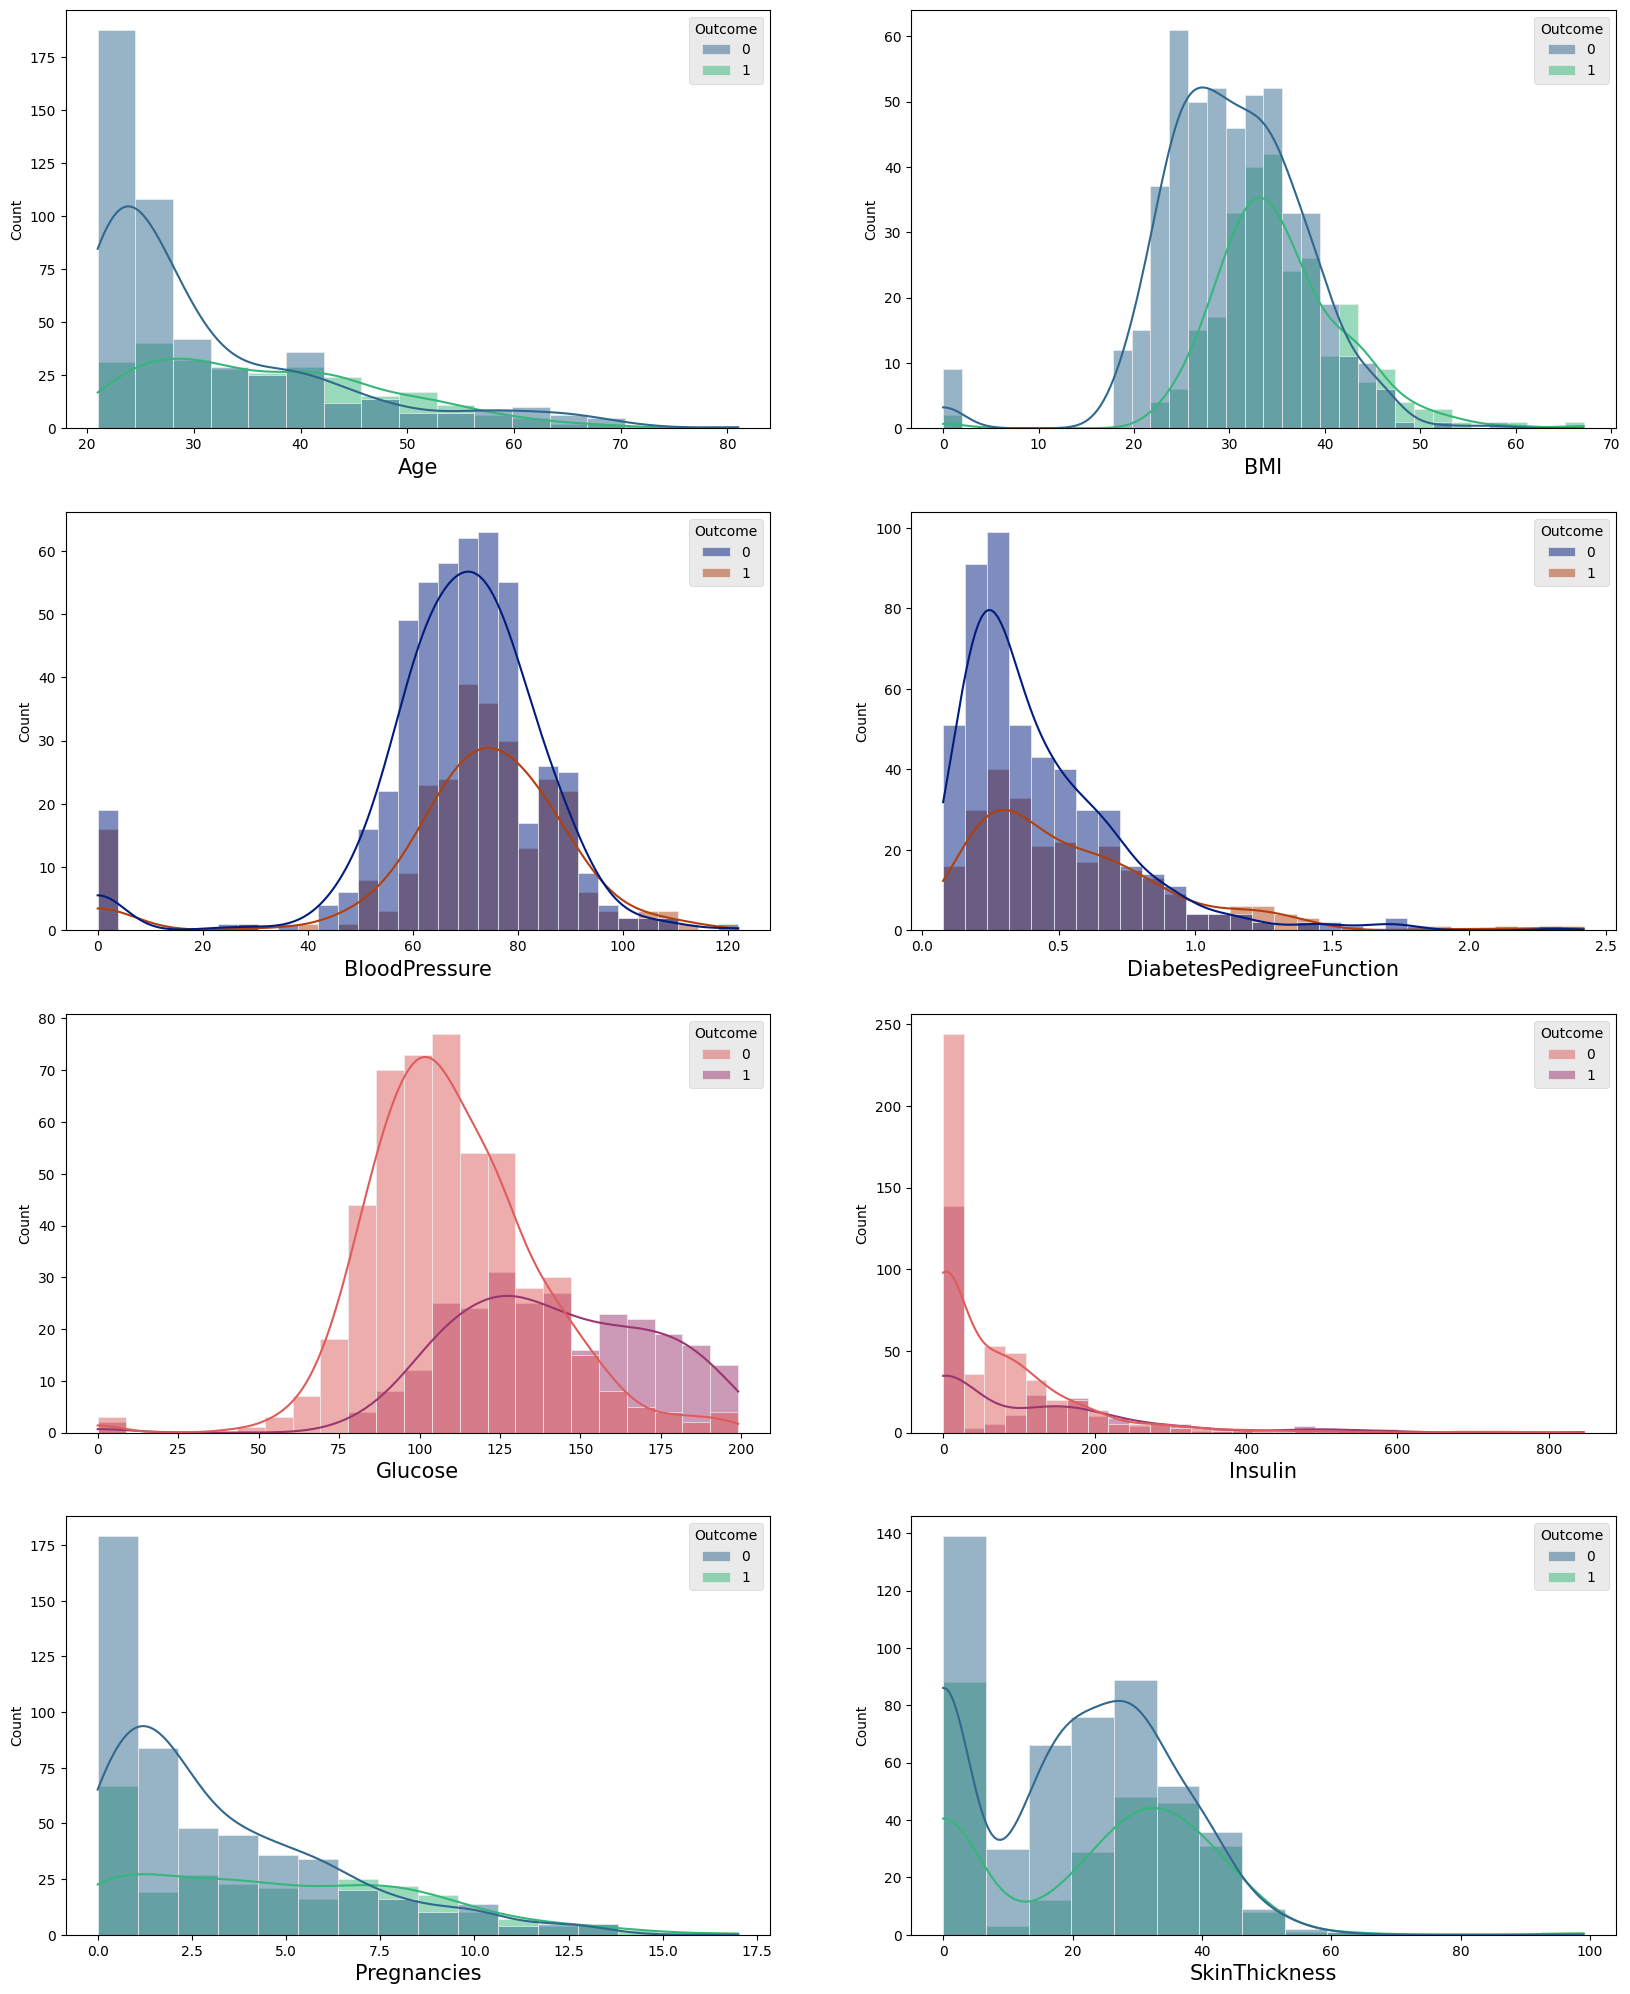

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(20, 25))
plt.style.use('ggplot')

sns.histplot(x = df['Age'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 0])
ax[0,0].set_xlabel('Age', fontsize = 15)

sns.histplot(x = df['BMI'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[0, 1])
ax[0,1].set_xlabel('BMI', fontsize = 15)


sns.histplot(x = df['BloodPressure'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 0])
ax[1,0].set_xlabel('BloodPressure', fontsize = 15)

sns.histplot(x = df['DiabetesPedigreeFunction'], hue = df['Outcome'], palette="dark",kde = True, ax = ax[1, 1])
ax[1,1].set_xlabel('DiabetesPedigreeFunction', fontsize = 15)


sns.histplot(x = df['Glucose'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 0])
ax[2,0].set_xlabel('Glucose', fontsize = 15)

sns.histplot(x = df['Insulin'], hue = df['Outcome'], palette="flare",kde = True, ax = ax[2, 1])
ax[2,1].set_xlabel('Insulin', fontsize = 15)


sns.histplot(x = df['Pregnancies'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 0])
ax[3,0].set_xlabel('Pregnancies', fontsize = 15)

sns.histplot(x = df['SkinThickness'], hue = df['Outcome'], palette="viridis",kde = True, ax = ax[3, 1])
ax[3,1].set_xlabel('SkinThickness', fontsize = 15)

<Axes: >

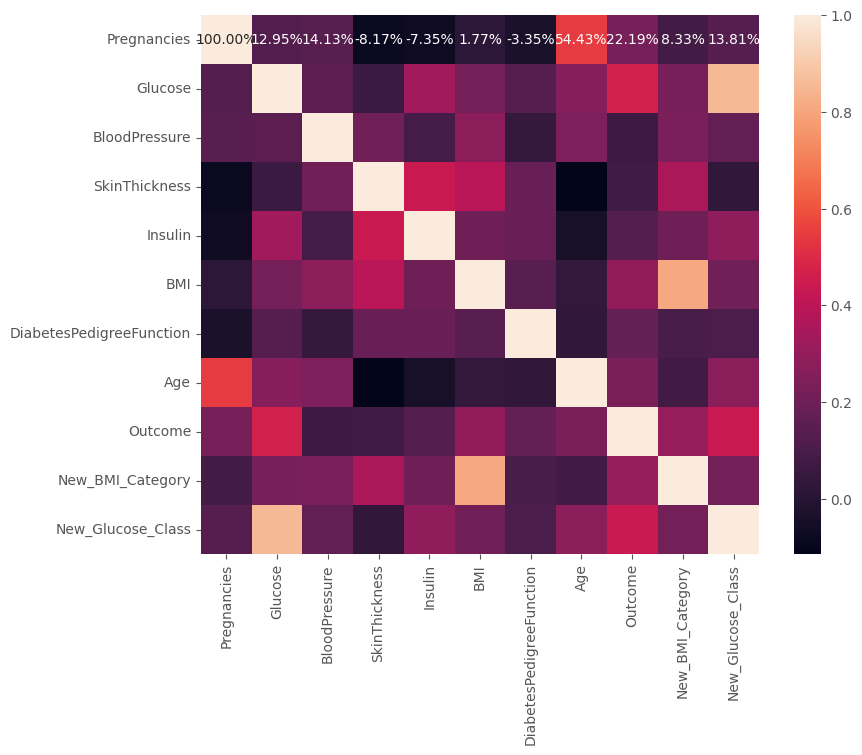

In [7]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2%')

In [8]:
df.shape

(768, 11)

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
New_BMI_Category            0
New_Glucose_Class           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   New_BMI_Category          768 non-null    int64  
 10  New_Glucose_Class         768 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.1 KB


![Anlamsız datalar](image/data_silme.jpg)

https://dergipark.org.tr/en/download/article-file/1970853

### Verilerin temizlenmesi
#### Literatür taramasında belirtildiği gibi bazı satırlarda anlamsız veriler bulunmakta. Örneğin, bir insanın glukoz seviyesi asla 0 olamaz. Literatürde bu tür veriler ortalama değerlerle değiştirilmiş olsa da ben bu anlamsız verileri silmeyi tercih ettim.

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_BMI_Category,New_Glucose_Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,2.450521,1.148438
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,0.792829,0.800161
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,2.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,3.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,3.000000,2.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,3.000000,2.000000


In [12]:
# Veri çerçevesinin kopyasını oluşturma bu kopya ile modellerimi eğiteceğim
df_copy = df.copy(deep=True)


In [13]:
# Bunu glucose değeri 0 olanları silmek için yapıyorum yada diğer featuresleride aynı şekilde
# 0 değerlerini NaN ile değiştirme
df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


In [14]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
New_BMI_Category              0
New_Glucose_Class             0
dtype: int64

In [15]:
df_copy.shape

(768, 11)

In [16]:
# non ifadeleri siliyorum
data_cleaned = df_copy.dropna()
df_copy=data_cleaned

### Anlamsız verilerden arındırılmış histogram grafiği

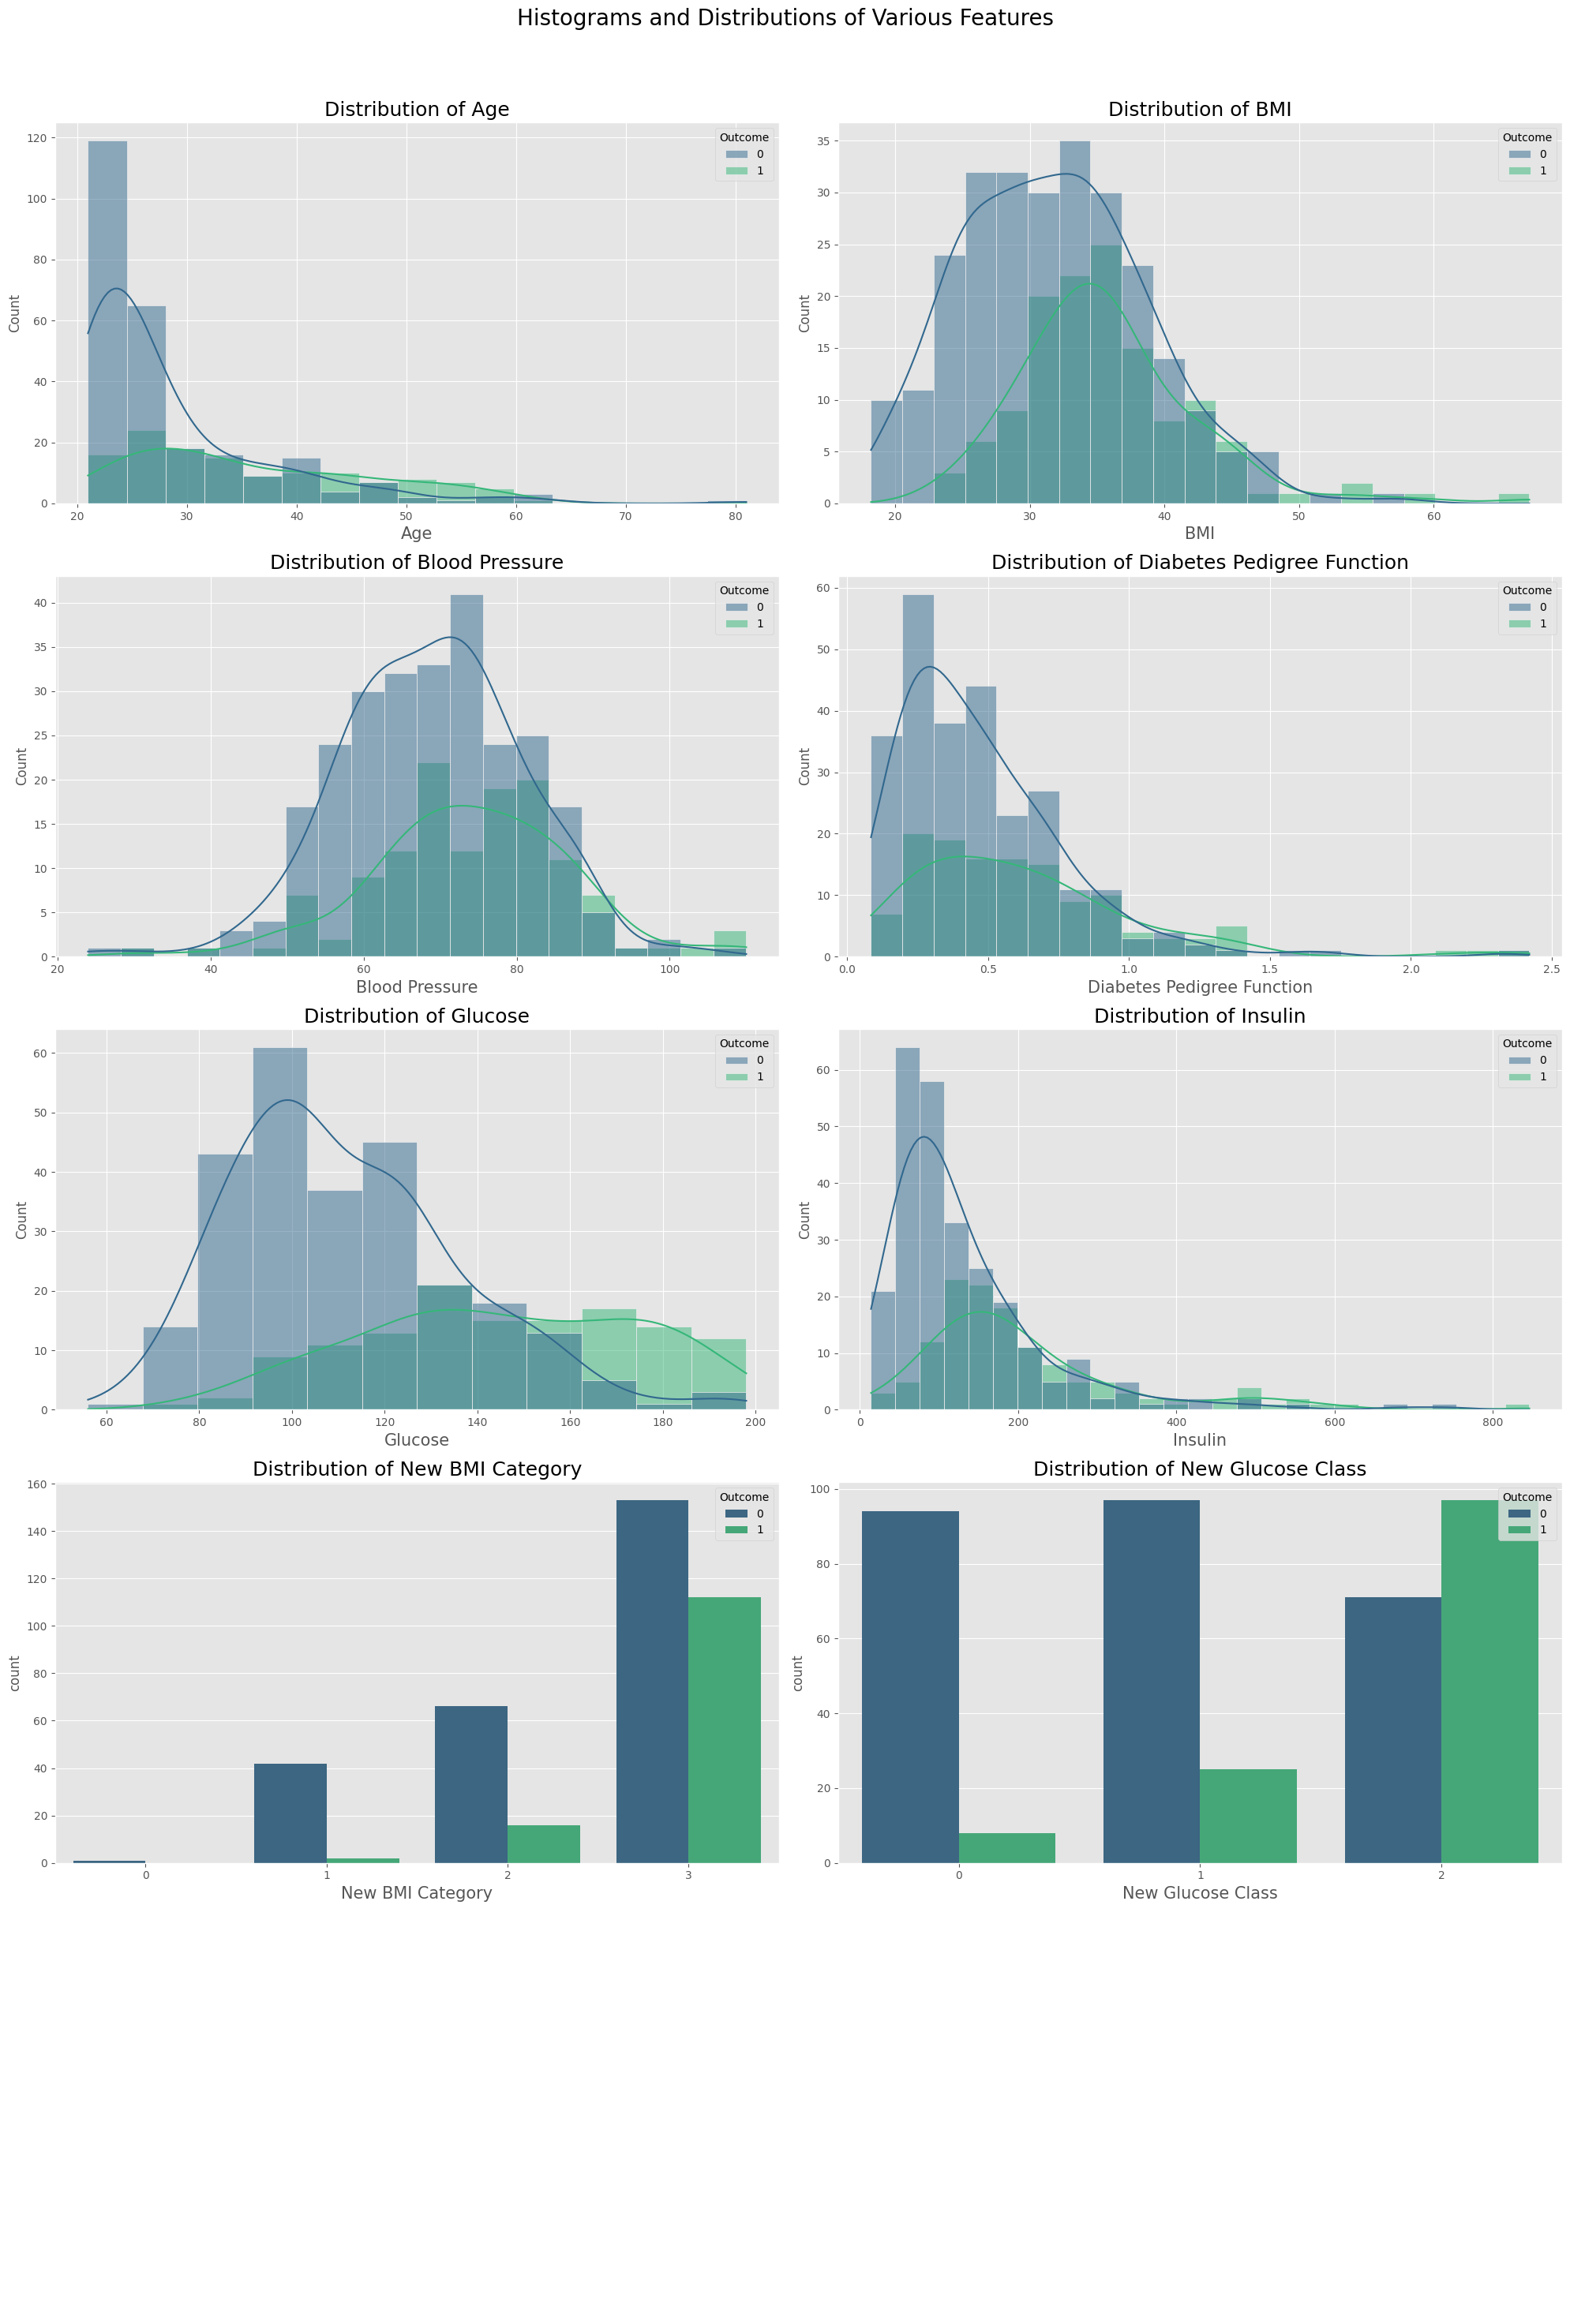

In [17]:
fig, ax = plt.subplots(5, 2, figsize=(20, 30))
plt.style.use('ggplot')

# Histograma grafikleri ve KDE eğrileri
sns.histplot(x=df_copy['Age'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[0, 0])
ax[0, 0].set_xlabel('Age', fontsize=15)
ax[0, 0].set_title('Distribution of Age', fontsize=18)

sns.histplot(x=df_copy['BMI'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[0, 1])
ax[0, 1].set_xlabel('BMI', fontsize=15)
ax[0, 1].set_title('Distribution of BMI', fontsize=18)

sns.histplot(x=df_copy['BloodPressure'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[1, 0])
ax[1, 0].set_xlabel('Blood Pressure', fontsize=15)
ax[1, 0].set_title('Distribution of Blood Pressure', fontsize=18)

sns.histplot(x=df_copy['DiabetesPedigreeFunction'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[1, 1])
ax[1, 1].set_xlabel('Diabetes Pedigree Function', fontsize=15)
ax[1, 1].set_title('Distribution of Diabetes Pedigree Function', fontsize=18)

sns.histplot(x=df_copy['Glucose'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[2, 0])
ax[2, 0].set_xlabel('Glucose', fontsize=15)
ax[2, 0].set_title('Distribution of Glucose', fontsize=18)

sns.histplot(x=df_copy['Insulin'], hue=df_copy['Outcome'], palette="viridis", kde=True, ax=ax[2, 1])
ax[2, 1].set_xlabel('Insulin', fontsize=15)
ax[2, 1].set_title('Distribution of Insulin', fontsize=18)

# Kategorik özelliklerin dağılımı
sns.countplot(x=df_copy['New_BMI_Category'], hue=df_copy['Outcome'], palette="viridis", ax=ax[3, 0])
ax[3, 0].set_xlabel('New BMI Category', fontsize=15)
ax[3, 0].set_title('Distribution of New BMI Category', fontsize=18)

sns.countplot(x=df_copy['New_Glucose_Class'], hue=df_copy['Outcome'], palette="viridis", ax=ax[3, 1])
ax[3, 1].set_xlabel('New Glucose Class', fontsize=15)
ax[3, 1].set_title('Distribution of New Glucose Class', fontsize=18)

# Boş alt sağ köşe
ax[4, 0].axis('off')
ax[4, 1].axis('off')

# Genel başlık
fig.suptitle('Histograms and Distributions of Various Features', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Veri temizleme işlemlerinden sonra eski data ve şu anki datanın ortalama benzeri değerlerine bakıyorum ve yeni veri setimin büyüklüğünü inceliyorum

In [18]:
target_vals = df_copy['Outcome'].value_counts()
target_vals

Outcome
0    262
1    130
Name: count, dtype: int64

In [19]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Category,New_Glucose_Class
Outcome,,,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,2.272000,0.894000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,2.783582,1.623134


In [20]:
df_copy.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Category,New_Glucose_Class
Outcome,,,,,,,,,,
0,2.721374,111.431298,68.969466,27.251908,130.854962,31.750763,0.472168,28.347328,2.416031,0.912214
1,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462,2.846154,1.684615


In [21]:
print("Percentage of patients without diabetes: " , round(target_vals[0]/len(df_copy.Outcome), 2)*100)
print("Percentage of patients with diabetes: " , round(target_vals[1]/len(df_copy.Outcome), 2)*100)

Percentage of patients without diabetes:  67.0
Percentage of patients with diabetes:  33.0


### Veri setimi X ve Y gibi değişkenlere ayrırıp gerekli modelleme işlemleri için hazırlıyorum ve scale ediyorum

In [22]:
x = df_copy.drop(columns='Outcome', axis = 1)
x.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,New_BMI_Category,New_Glucose_Class
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,2,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,3,2
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,3,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,3,2
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,3,2


In [23]:
y = df_copy['Outcome']
y.head()

3     0
4     1
6     1
8     1
13    1
Name: Outcome, dtype: int64

In [24]:
scalar = StandardScaler()
scalar.fit(x)
standardized_data = scalar.transform(x)



In [25]:
pkl.dump(scalar, open('scaler.pkl', 'wb'))
# scalar

In [26]:
X = standardized_data
Y = df_copy['Outcome']

In [27]:
# Modelleri daha kolay oluşturmak ve test etmek için metot oluşturdum

def evaluate_model(model, train_x, train_y, test_x, test_y, model_name):
    # Modeli eğitim verileriyle fit etme
    model.fit(train_x, train_y)
    
    # Tahmin yapma
    train_pred = model.predict(train_x)
    test_pred = model.predict(test_x)
    
    # Performans değerlendirme
    train_accuracy = accuracy_score(train_y, train_pred)
    test_accuracy = accuracy_score(test_y, test_pred)
    print(f"\n{model_name} - Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"{model_name} - Testing Accuracy: {test_accuracy * 100:.2f}%")
    
    # Classification report
    print(f"\n{model_name} - Classification Report (Test Set):\n", classification_report(test_y, test_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(test_y, test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()


In [28]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.25, stratify=y, random_state = 2)

In [29]:
print('train x :',train_x.shape)
print('test x :',test_x.shape)
print('train y :',train_y.shape)
print('test y :',test_y.shape)

train x : (294, 10)
test x : (98, 10)
train y : (294,)
test y : (98,)


### Bu aşamada logistic regresyon yapmaya karar verdim ama diğer makine öğrenmesi yöntemlerinide denemek istedim ayrıca Kmeans ile veri dağılımlarını görselleştirmek istedim 

In [43]:
# KMeans Modelini Tanımlama ve Fit Etme
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

C:\Users\90551\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


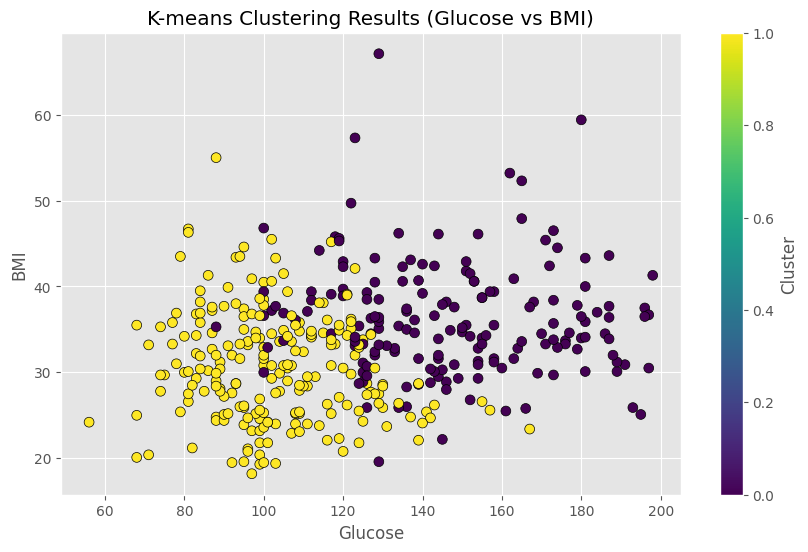

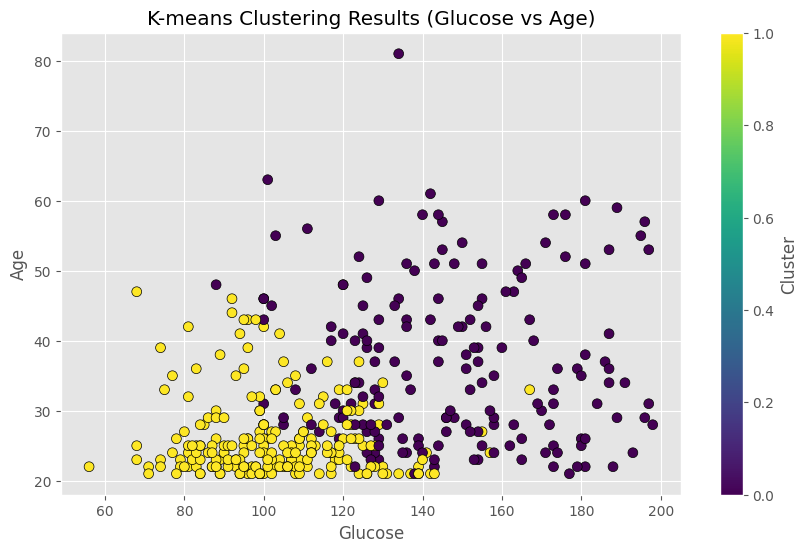

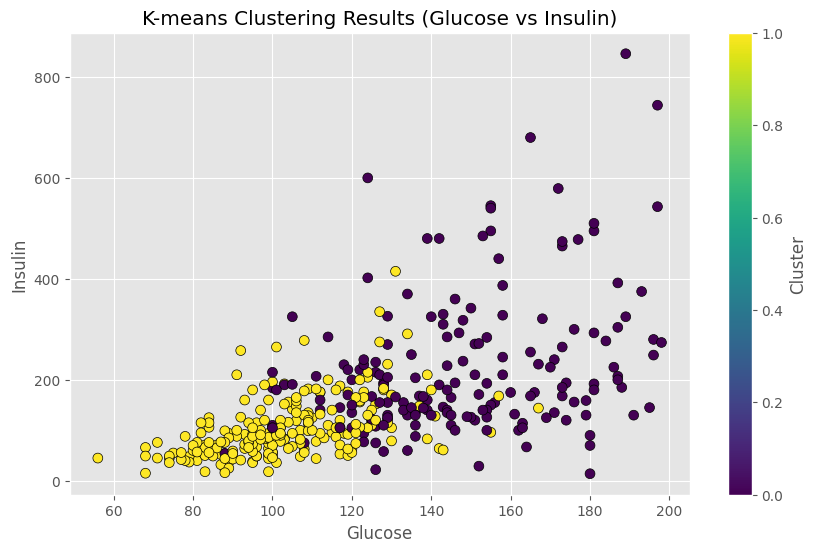

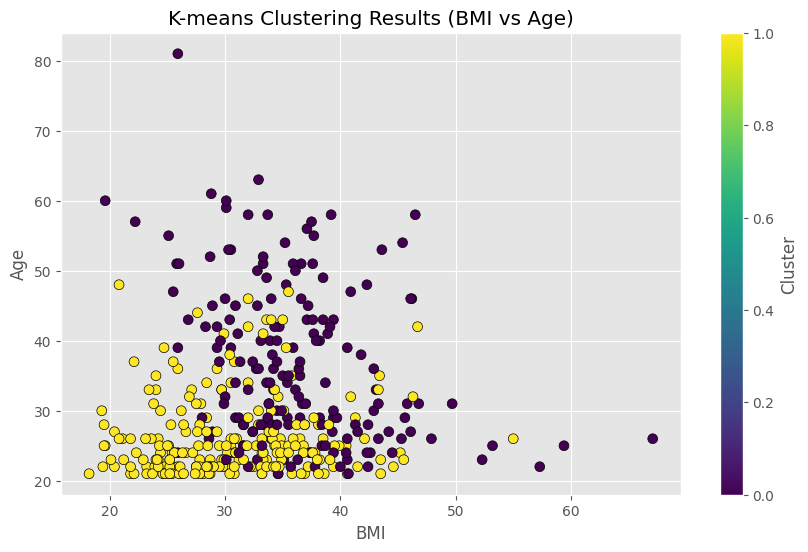

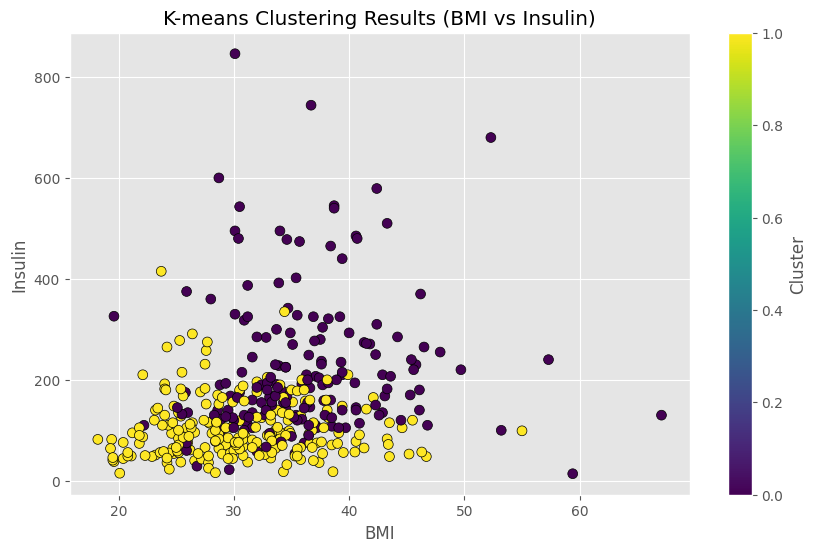

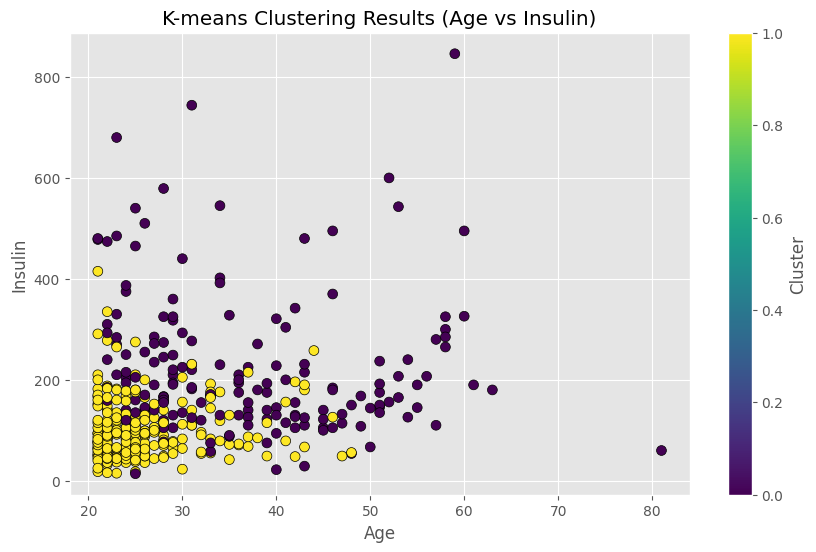

Küme Merkezleri:
[[ 0.43885504  0.79595525  0.43219679  0.45132871  0.55607899  0.43346367
   0.126773    0.56014613  0.43617417  0.79129715]
 [-0.35391535 -0.6418994  -0.3485458  -0.36397477 -0.4484508  -0.34956747
  -0.10223629 -0.45173075 -0.35175337 -0.63814286]]


In [44]:
df_copy['Cluster'] = clusters

# Özelliklerin her bir çiftini kullanarak kümeleri görselleştirme
features = ['Glucose', 'BMI', 'Age', 'Insulin']

for i in range(len(features)):
    for j in range(i + 1, len(features)):
        plt.figure(figsize=(10, 6))
        plt.scatter(df_copy[features[i]], df_copy[features[j]], c=df_copy['Cluster'], cmap='viridis', edgecolor='k', s=50)
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.title(f'K-means Clustering Results ({features[i]} vs {features[j]})')
        plt.colorbar(label='Cluster')
        plt.show()

# Küme merkezlerini yazdırma
print("Küme Merkezleri:")
print(kmeans.cluster_centers_)


Logistic Regression - Training Accuracy: 79.25%
Logistic Regression - Testing Accuracy: 74.49%

Logistic Regression - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.92      0.68      0.78        66
           1       0.57      0.88      0.69        32

    accuracy                           0.74        98
   macro avg       0.74      0.78      0.74        98
weighted avg       0.81      0.74      0.75        98



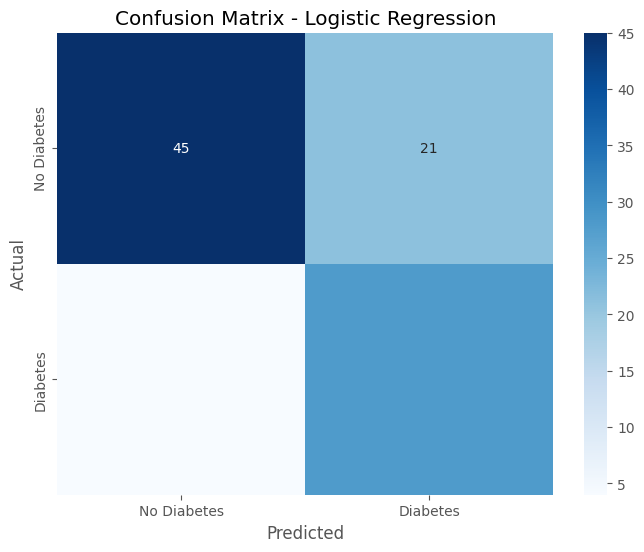

In [45]:
# Logistic Regression modeli
lr = LogisticRegression(class_weight='balanced')

# Modeli değerlendirme
evaluate_model(lr, train_x, train_y, test_x, test_y,'Logistic Regression')


K Neighbors Classifier - Training Accuracy: 83.33%
K Neighbors Classifier - Testing Accuracy: 72.45%

K Neighbors Classifier - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        66
           1       0.59      0.50      0.54        32

    accuracy                           0.72        98
   macro avg       0.68      0.67      0.67        98
weighted avg       0.72      0.72      0.72        98



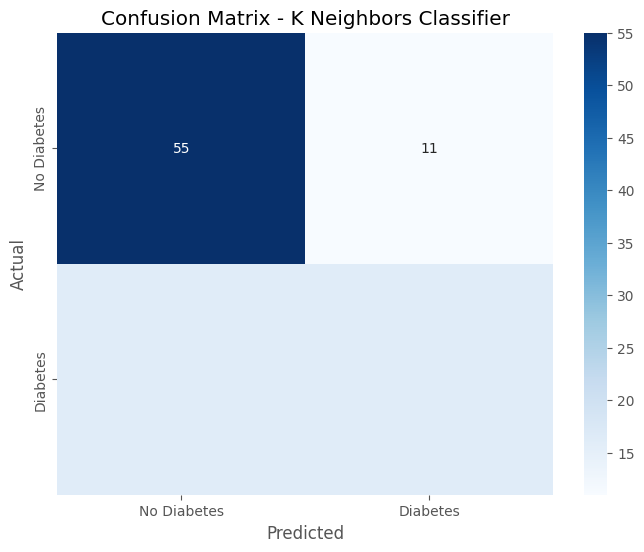

In [46]:
knn = KNeighborsClassifier(n_neighbors=5)
# Modeli değerlendirme

evaluate_model(knn, train_x, train_y, test_x, test_y,'K Neighbors Classifier')


Support Vector Machine - Training Accuracy: 80.61%
Support Vector Machine - Testing Accuracy: 77.55%

Support Vector Machine - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.81      0.86      0.84        66
           1       0.68      0.59      0.63        32

    accuracy                           0.78        98
   macro avg       0.75      0.73      0.74        98
weighted avg       0.77      0.78      0.77        98



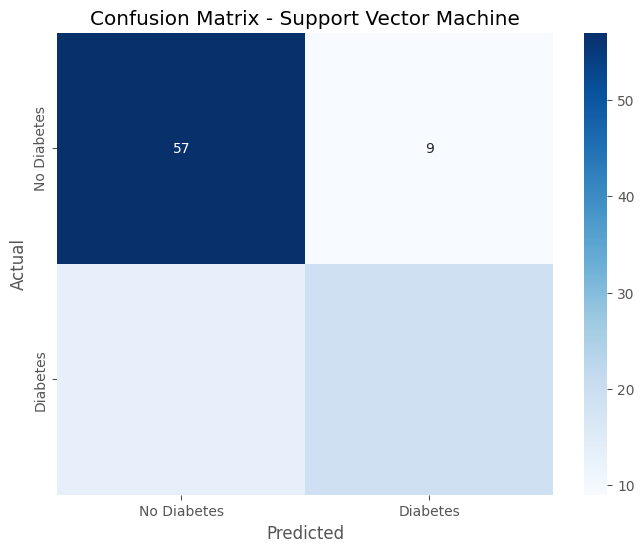

In [47]:
svm = SVC(kernel='linear')  # lineer kernel

evaluate_model(svm, train_x, train_y, test_x, test_y,'Support Vector Machine')


 Gradient Boosting Classifier - Training Accuracy: 99.66%
 Gradient Boosting Classifier - Testing Accuracy: 77.55%

 Gradient Boosting Classifier - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        66
           1       0.66      0.66      0.66        32

    accuracy                           0.78        98
   macro avg       0.74      0.74      0.74        98
weighted avg       0.78      0.78      0.78        98



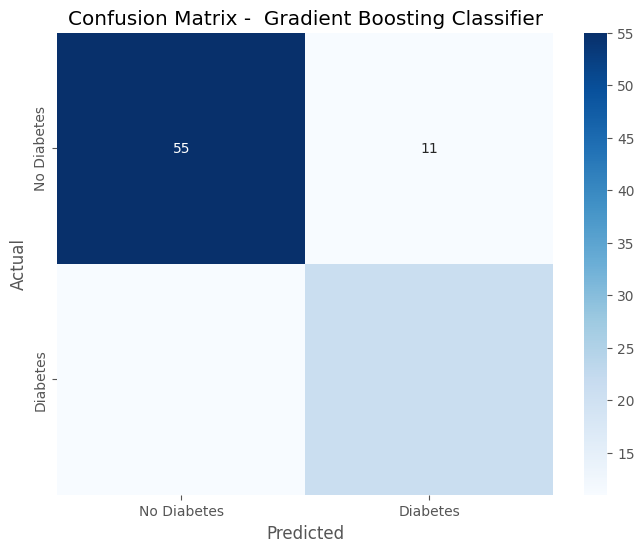

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
evaluate_model(gb, train_x, train_y, test_x, test_y,' Gradient Boosting Classifier')


XGBoost Classifier - Training Accuracy: 100.00%
XGBoost Classifier - Testing Accuracy: 74.49%

XGBoost Classifier - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        66
           1       0.61      0.62      0.62        32

    accuracy                           0.74        98
   macro avg       0.71      0.71      0.71        98
weighted avg       0.75      0.74      0.75        98



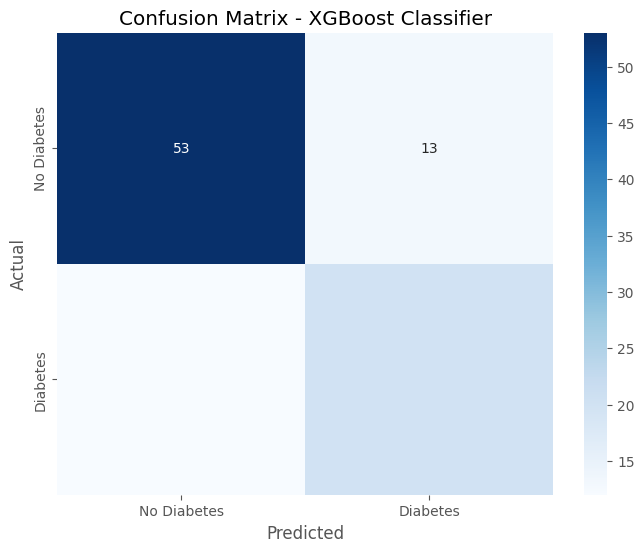

In [49]:
xgb_model = XGBClassifier(eval_metric='mlogloss')  # eval_metric belirlenebilir

evaluate_model(xgb_model, train_x, train_y, test_x, test_y,'XGBoost Classifier')

[LightGBM] [Info] Number of positive: 98, number of negative: 196
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 451
[LightGBM] [Info] Number of data points in the train set: 294, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.333333 -> initscore=-0.693147
[LightGBM] [Info] Start training from score -0.693147
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

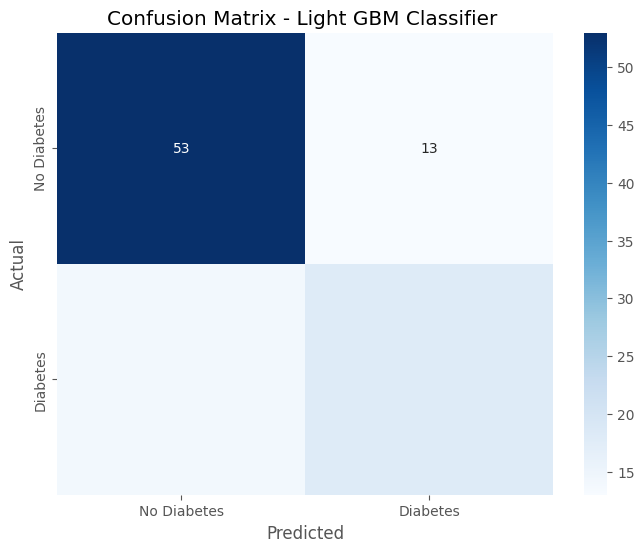

In [50]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

evaluate_model(lgbm, train_x, train_y, test_x, test_y,'Light GBM Classifier ')


Cat Boost Classifier  - Training Accuracy: 84.35%
Cat Boost Classifier  - Testing Accuracy: 78.57%

Cat Boost Classifier  - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        66
           1       0.69      0.62      0.66        32

    accuracy                           0.79        98
   macro avg       0.76      0.74      0.75        98
weighted avg       0.78      0.79      0.78        98



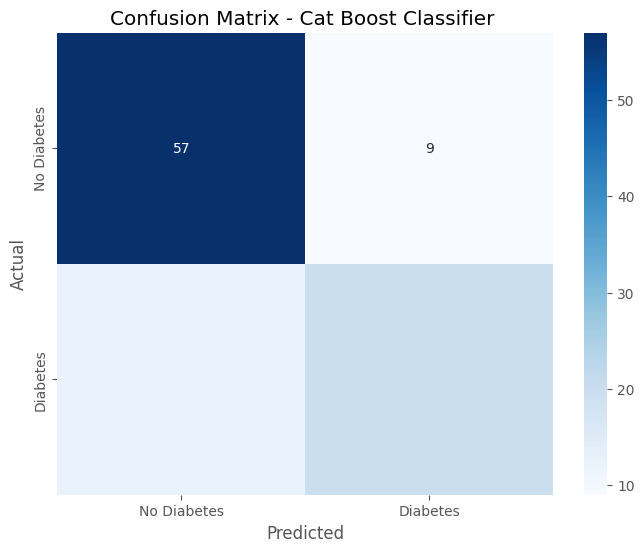

In [41]:
from catboost import CatBoostClassifier

# Modeli oluşturma
catboost = CatBoostClassifier(learning_rate=0.1, iterations=50, depth=5, silent=True)

evaluate_model(catboost, train_x, train_y, test_x, test_y,'Cat Boost Classifier ')


Decision Tree Classifier - Training Accuracy: 99.32%
Decision Tree Classifier - Testing Accuracy: 71.43%

Decision Tree Classifier - Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.82      0.74      0.78        66
           1       0.55      0.66      0.60        32

    accuracy                           0.71        98
   macro avg       0.68      0.70      0.69        98
weighted avg       0.73      0.71      0.72        98



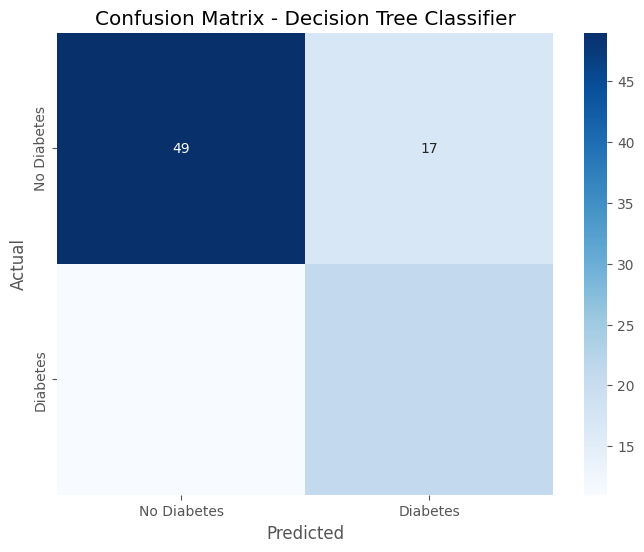

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Modeli oluşturma
dt = DecisionTreeClassifier(max_depth=8)
evaluate_model(dt, train_x, train_y, test_x, test_y,'Decision Tree Classifier')